In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import re
import string
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from wordcloud import STOPWORDS
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from xgboost import plot_importance as xgb_plot_importance
from lightgbm import LGBMModel,LGBMClassifier
from lightgbm import plot_importance as lgbm_plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
np.random.seed(42) # setting the seed for reproducibility
stop_words = set(stopwords.words('english'))
punctuation = punctuation + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
df=pd.read_excel('/content/drugsCom_raw.xlsx')
print ("The shape of the dataset given is : ", df.shape)
print(df.info())
df

The shape of the dataset given is :  (161297, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   161297 non-null  int64         
 1   drugName     161297 non-null  object        
 2   condition    160398 non-null  object        
 3   review       161297 non-null  object        
 4   rating       161297 non-null  int64         
 5   date         161297 non-null  datetime64[ns]
 6   usefulCount  161297 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 8.6+ MB
None


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79


In [3]:
# Rename the unnamed column to 'id_no' for better understanding
df.rename(columns={'Unnamed: 0': 'id_no'}, inplace=True)
df.head()

,id_no,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [4]:
#Preliminary data analysis
print(df.describe())

#Checking for null values
print ("Null values in the dataset :", df.isnull().sum(axis = 0))

# Calculating what percentage of data is null
size = df.shape[0]

print ("Total Size of the dataset :", size)

total_na = df.isnull().sum(axis = 0)['condition']
print ("Null values : ", total_na)

print ("PERCENTAGE : ", (total_na/size)*100)

               id_no         rating                           date  \
count  161297.000000  161297.000000                         161297   
mean   115923.585305       6.994377  2014-06-11 08:51:43.779983360   
min         2.000000       1.000000            2008-02-24 00:00:00   
25%     58063.000000       5.000000            2012-04-12 00:00:00   
50%    115744.000000       8.000000            2015-06-09 00:00:00   
75%    173776.000000      10.000000            2016-08-19 00:00:00   
max    232291.000000      10.000000            2017-12-12 00:00:00   
std     67004.445170       3.272329                            NaN   

         usefulCount  
count  161297.000000  
mean       28.004755  
min         0.000000  
25%         6.000000  
50%        16.000000  
75%        36.000000  
max      1291.000000  
std        36.403742  
Null values in the dataset : id_no            0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0


In [5]:
# Dropping the data points with null values as it's very much less than 5% of the whole dataset
df=df.dropna(how = 'any', axis = 0)

print ("The shape of the dataset after null values removal :", df.shape)

# lowercasing the column names so it will be easier for access
df.columns = df.columns.str.lower()

# Sorting the dataframe
df.sort_values(['id_no'], ascending = True, inplace = True)
df.reset_index(drop = True, inplace = True)
print(df.head(10))

# Converting the date in to date time format
df['date'] = pd.to_datetime(df['date'])

# Total unique conditions in the dataset
print (df['condition'].nunique(), "\n")
print ("some of the conditions are : ", df['condition'].unique()[0:10],"\n")

# top 10 drugs with rating equals 1
print(df.loc[df['rating'] == 1, :]['drugname'].value_counts().head(10),"\n")

print(df.loc[df.usefulcount == 0, 'drugname'].value_counts(),"\n")

# Range of the rating in the dataset
print (df['rating'].min(), "-", df['rating'].max())

The shape of the dataset after null values removal : (160398, 7)
   id_no             drugname                  condition  \
0      2  Medroxyprogesterone                 Amenorrhea   
1      3  Medroxyprogesterone  Abnormal Uterine Bleeding   
2      4  Medroxyprogesterone              Birth Control   
3      5  Medroxyprogesterone  Abnormal Uterine Bleeding   
4      7  Medroxyprogesterone  Abnormal Uterine Bleeding   
5      8  Medroxyprogesterone  Abnormal Uterine Bleeding   
6      9  Medroxyprogesterone  Abnormal Uterine Bleeding   
7     10  Medroxyprogesterone  Abnormal Uterine Bleeding   
8     12  Medroxyprogesterone  Abnormal Uterine Bleeding   
9     14  Medroxyprogesterone              Birth Control   

                                              review  rating       date  \
0  "I&#039;m 21 years old and recently found out ...      10 2015-10-27   
1  "I have been on the shot 11 years and until a ...       8 2015-10-27   
2  "Ive had four shots at this point. I was on bi

# EDA/Data Visualization

In [ ]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

# Grouping the data by rating and count the frequency of each rating
rating_counts = df.groupby('rating').size().reset_index(name='counts')

# Sort the data by the frequency of each rating
rating_counts = rating_counts.sort_values(by='counts',ascending=False)

# Plot a bar chart of the 20 most popular ratings
plt.figure(figsize=(15,10))
rating_counts[:20].plot.bar(x='rating',y='counts',color='blue')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('20 most popular ratings')
plt.show()

# Plot a pie chart of the distribution of ratings
plt.figure(figsize=(15,10))
plt.pie(rating_counts['counts'], labels=rating_counts['rating'], startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Ratings')
plt.show()

# Get the 20 most popular drugs based on usefulCount
plt.figure(figsize=(20,10))
top_20_drugs = df.groupby('drugname')['usefulcount'].sum().sort_values(ascending=False).head(20)

# Plot the bar plot
top_20_drugs.plot(kind='bar', color='blue')
plt.xlabel('Drug Name')
plt.ylabel('Useful Count')
plt.title('Top 20 Drugs based on Useful Count')
plt.xticks(rotation=90)
plt.show()

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(str(df['drugname']))

plt.rcParams['figure.figsize'] = (17, 17)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Create separate dataframes/datasets/objects with respect to disease

df_dep= df[df['condition']== 'Depression']
df_diab= df[df['condition']== 'Diabetes, Type 2']
df_bp= df[df['condition']== 'High Blood Pressure']


plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500,width=1600,height=800).generate(" ".join(df_dep.review))
plt.imshow(wc,interpolation='bilinear')
plt.title('word cloud for Depression',fontsize=14)

plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500,width=1600,height=800).generate(" ".join(df_diab.review))
plt.imshow(wc,interpolation='bilinear')
plt.title('word cloud for Diabetes, Type 2',fontsize=14)

plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500,width=1600,height=800).generate(" ".join(df_bp.review))
plt.imshow(wc,interpolation='bilinear')
plt.title('word cloud for High Blood Pressure',fontsize=14)

Output hidden; open in https://colab.research.google.com to view.

# Data Preprocessing/Feature Engineering

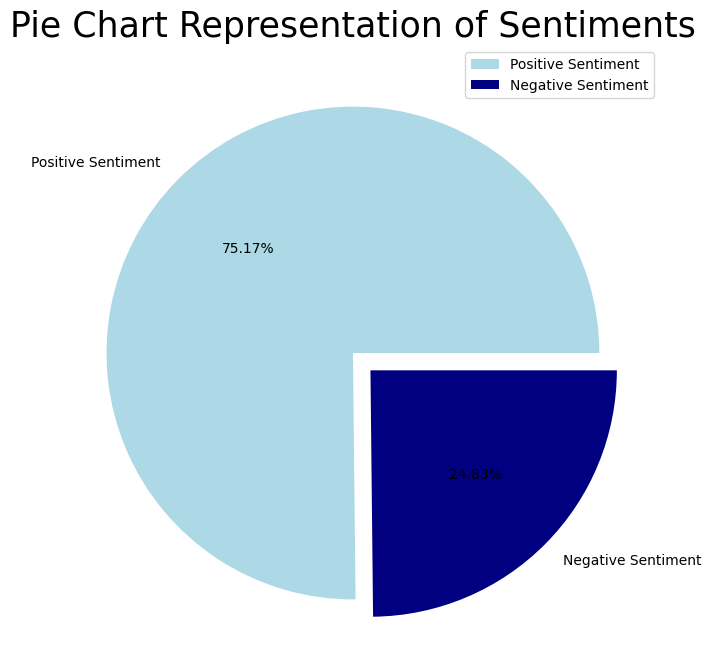

In [6]:
# Feature engineering
# Creating a new column review sentiment


df.loc[(df['rating'] >= 5), 'Review_Sentiment'] = 1
df.loc[(df['rating'] < 5), 'Review_Sentiment'] = 0

df['Review_Sentiment'].value_counts()

# a pie chart to represent the sentiments of the patients

size = [120570, 39828]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (12, 8)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

In [7]:
#Focusing on only mentioned condtions.
conditions = ["Depression", "High Blood Pressure", "Diabetes, Type 2"]
df = df[df['condition'].isin(conditions)].dropna(subset=['review']).reset_index(drop=True)

# Text cleaning function with stopwords removal, lemmatization, and stemming
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

stop_words = set(nltk.corpus.stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [8]:
# Create a dictionary to map conditions to labels
condition_mapping = {
    "Depression": 0,
    "Diabetes, Type 2": 1,
    "High Blood Pressure": 2
}

# Create a new column 'condition_label' based on the mapping
df['condition_label'] = df['condition'].map(condition_mapping)

# Display the value counts for the new labels
print(df['condition_label'].value_counts())

condition_label
0    9069
1    2554
2    2321
Name: count, dtype: int64


In [9]:
def clean_text(text):
    text = text.lower() #converting to lowercase
    text = re.sub(r'<.*?>', '', text) #Removes HTML
    text = re.sub(r'[^a-zA-Z\s]', '', text) #Removes punctuation and symbols
    text = re.sub(r'\s+', ' ', text).strip() #Removes extra whitespaces
    tokens = text.split() #Tokenize the text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] #Removes common words and converts words to their base form
    tokens = [stemmer.stem(word) for word in tokens] #Cuts words down to thier root form
    return ' '.join(tokens) #Converts list of cleaned tokens back into a single string

In [10]:
# Apply cleaning
nltk.download('wordnet')
df['clean_review'] = df['review'].apply(clean_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [11]:
# Define Features and Target
X = df['clean_review']
y = df['condition']

# Vectorization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X)

# Encoding target labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [12]:
df_cleaned=df.drop(columns=['id_no', 'drugname', 'rating', 'date', 'usefulcount'],axis=1)
df_cleaned

,condition,review,Review_Sentiment,condition_label,clean_review
0,Depression,"""I&#039;ve been diagnosed with ADD at the age ...",1.0,0,ive diagnos add age struggl major depress sinc...
1,Depression,"""I&#039;ve been on antidepressants from the ol...",1.0,0,ive antidepress old style newer ssri snri othe...
2,High Blood Pressure,"""White spots In my mouth. It only works for t...",0.0,2,white spot mouth work ten hour ear start ring ...
3,High Blood Pressure,"""Had first bypass op in 1982, second a triple ...",1.0,2,first bypass op second tripl take mg tablet pe...
4,High Blood Pressure,"""I can only take 1/4 of a 25 mg tablet a day, ...",0.0,2,take mg tablet day still get extrem tire make ...
...,...,...,...,...,...
13939,Depression,"""I&#039;m 21 years of age and up to now, I&#03...",1.0,0,im year age ive take mg past month sinc ive su...
13940,Depression,"""I&#039;ve taken 40 mg of paxil for anxiety an...",1.0,0,ive taken mg paxil anxieti depress year life c...
13941,Depression,"""After going through a hurtful breakup and loo...",0.0,0,go hurt breakup loos job fell dark life lost i...
13942,Depression,"""It helped withy my anxiety, which didn&#039;t...",0.0,0,help withi anxieti didnt go away becam manag d...


In [13]:
# Define a function to plot confusion matrix
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Model Building and Evaluation


Logistic Regression Results:
Best Parameters: {'C': 20}
Mean CV Accuracy: 0.9586065573770493
Test Accuracy: 0.9610420650095602
                     precision    recall  f1-score   support

         Depression       0.97      0.99      0.98      2721
   Diabetes, Type 2       0.97      0.94      0.96       766
High Blood Pressure       0.93      0.88      0.91       697

           accuracy                           0.96      4184
          macro avg       0.95      0.94      0.95      4184
       weighted avg       0.96      0.96      0.96      4184



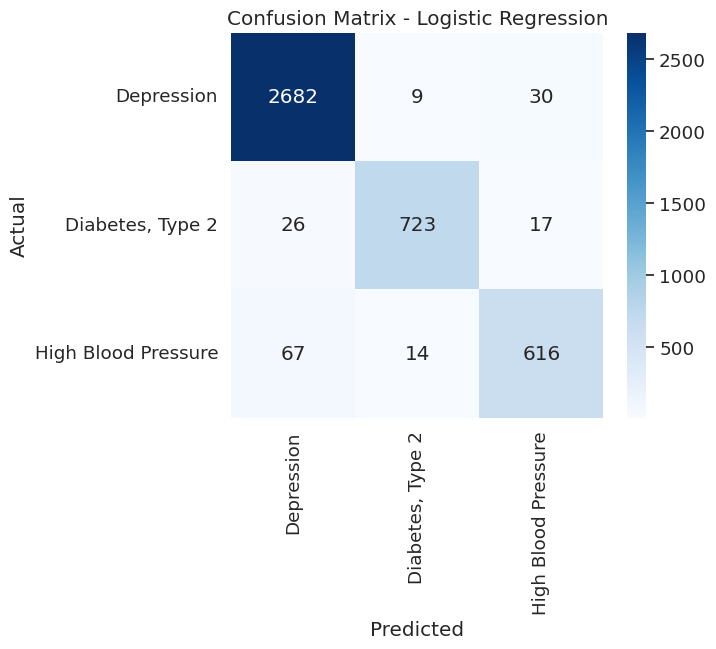

In [ ]:
#MODEL-1

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=200)
logreg_params = {'C': [0.1, 1, 20]}
gs_logreg = GridSearchCV(logreg, logreg_params, cv=5)
gs_logreg.fit(X_train, y_train)
y_pred_logreg = gs_logreg.predict(X_test)
print("\nLogistic Regression Results:")
print("Best Parameters:", gs_logreg.best_params_)
print("Mean CV Accuracy:", gs_logreg.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, target_names=encoder.classes_))
plot_cm(y_test, y_pred_logreg, "Logistic Regression")

In [ ]:
def predict_condition(review):

  cleaned_review = clean_text(review)
  review_vector = vectorizer.transform([cleaned_review])
  predicted_label = gs_logreg.predict(review_vector)[0]
  predicted_condition = encoder.inverse_transform([predicted_label])[0]

  return predicted_condition

new_review = "I've been feeling very down lately and have lost interest in activities I used to enjoy."
predicted_condition = predict_condition(new_review)
print(f"Predicted condition for the review: {predicted_condition}")


Predicted condition for the review: Depression


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 68633
[LightGBM] [Info] Number of data points in the train set: 7808, number of used features: 1453
[LightGBM] [Info] Start training from score -0.430231
[LightGBM] [Info] Start training from score -1.697474
[LightGBM] [Info] Start training from score -1.792785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682

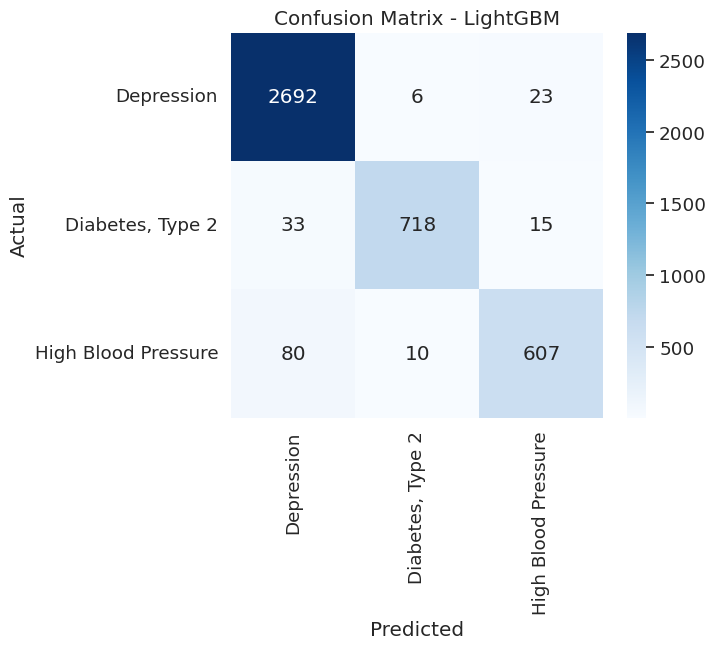

In [ ]:
#MODEL-2

# LightGBM with tuned hyperparameters
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm_params = {
    'num_leaves': [31, 60],
    'max_depth': [10, 30],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [50, 100]
}
gs_lgbm = GridSearchCV(lgbm, lgbm_params, cv=5)
gs_lgbm.fit(X_train, y_train)
y_pred_lgbm = gs_lgbm.predict(X_test)
print("\nLightGBM Results:")
print("Best Parameters:", gs_lgbm.best_params_)
print("Mean CV Accuracy:", gs_lgbm.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm, target_names=encoder.classes_))
plot_cm(y_test, y_pred_lgbm, "LightGBM")


Naive Bayes Results:
Mean CV Accuracy: 0.9073770491803279
Test Accuracy: 0.9259082217973231
                     precision    recall  f1-score   support

         Depression       0.91      1.00      0.95      2721
   Diabetes, Type 2       0.99      0.85      0.92       766
High Blood Pressure       0.97      0.73      0.83       697

           accuracy                           0.93      4184
          macro avg       0.95      0.86      0.90      4184
       weighted avg       0.93      0.93      0.92      4184



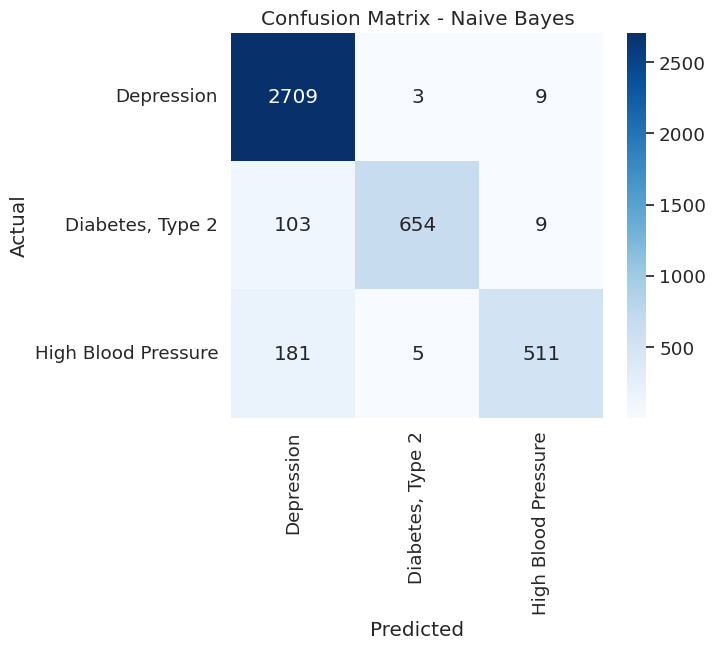

In [ ]:
#MODEL-3

# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
scores_nb = cross_val_score(nb, X_train, y_train, cv=5)
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("\nNaive Bayes Results:")
print("Mean CV Accuracy:", scores_nb.mean())
print("Test Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=encoder.classes_))
plot_cm(y_test, y_pred_nb, "Naive Bayes")


Support Vector Machine Results:
Best Parameters: {'C': 2, 'kernel': 'rbf'}
Mean CV Accuracy: 0.9568647540983607
Test Accuracy: 0.9615200764818356
                     precision    recall  f1-score   support

         Depression       0.96      0.99      0.97      2721
   Diabetes, Type 2       0.99      0.93      0.96       766
High Blood Pressure       0.95      0.88      0.91       697

           accuracy                           0.96      4184
          macro avg       0.97      0.93      0.95      4184
       weighted avg       0.96      0.96      0.96      4184



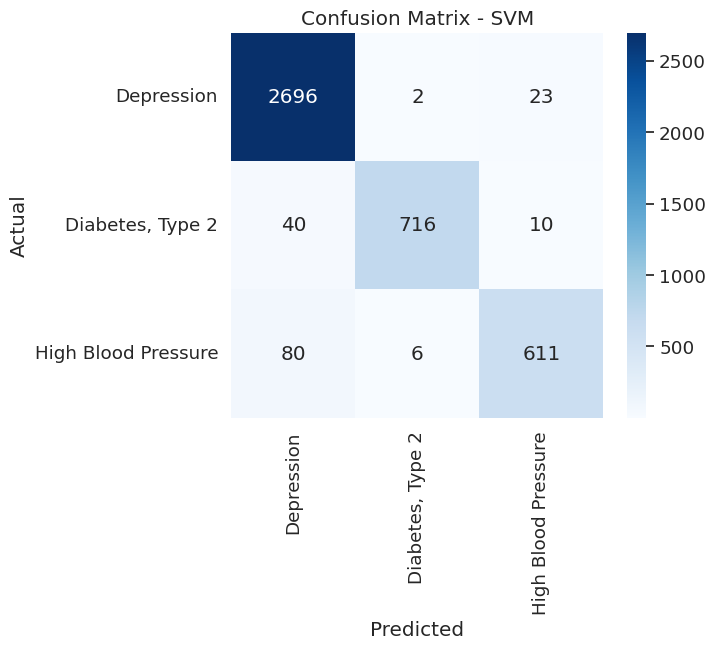

In [ ]:
#MODEL-4

# Support Vector Machine (SVM) Model
from sklearn.svm import SVC
svm = SVC()
svm_params = {'C': [0.1, 2], 'kernel': ['linear', 'rbf']}
gs_svm = GridSearchCV(svm, svm_params, cv=5)
gs_svm.fit(X_train, y_train)
y_pred_svm = gs_svm.predict(X_test)
print("\nSupport Vector Machine Results:")
print("Best Parameters:", gs_svm.best_params_)
print("Mean CV Accuracy:", gs_svm.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=encoder.classes_))
plot_cm(y_test, y_pred_svm, "SVM")


In [ ]:
y_train_pred_logreg = gs_logreg.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_logreg))

y_train_pred_lgbm = gs_lgbm.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_lgbm))

y_train_pred_nb = nb.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_nb))

y_train_pred_svm = gs_svm.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_svm))

Training Accuracy: 0.9977459016393443
Training Accuracy: 0.9988729508196721
Training Accuracy: 0.930327868852459
Training Accuracy: 0.9991803278688525


In [ ]:
# Save the model, vectorizer, and encoder
import joblib
joblib.dump(gs_logreg, "logreg_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(encoder, "label_encoder.pkl")

print("✅ All files saved: lgbm_model.pkl, tfidf_vectorizer.pkl, label_encoder.pkl")

✅ All files saved: lgbm_model.pkl, tfidf_vectorizer.pkl, label_encoder.pkl


In [ ]:
import joblib
from google.colab import files

# Download the saved model files
files.download('tfidf_vectorizer.pkl')
files.download('label_encoder.pkl')
files.download('logreg_model.pkl')